In [1]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [35]:
# Read the dataset into a pandas DataFrame
df = pd.read_csv("StudentPerformanceFactors_cleaned.csv")

# Display the first few rows to get an overview of the data
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Female,70


In [29]:
#This provides a summary of categorical columns, showing counts, unique values, and the most frequent categories, which is useful for understanding non-numerical data.

categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols].describe()

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Gender
count,6607,6607,6607,6607,6607,6607,6529,6607,6607,6607,6517,6607
unique,3,3,2,3,2,3,3,2,3,2,3,2
top,Medium,Medium,Yes,Medium,Yes,Low,Medium,Public,Positive,No,High School,Male
freq,3362,3319,3938,3351,6108,2672,3925,4598,2638,5912,3223,3814


In [7]:
# Describe statistical properties of numerical columns. The .describe() method gives us statistical insights like mean, median, standard deviation, etc., for numerical columns, helping us understand the distribution and spread of the data.

df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [36]:
# Implementing the "Rank" column based on "Exam_Score" without using ace_tools.
# This will rank students in descending order of their exam scores directly.

# Creating the Rank column based on descending Exam_Score
df['Rank'] = df['Exam_Score'].rank(ascending=False, method='dense').astype(int)

# Display the first few rows of the updated dataset with Rank column
df[['Exam_Score', 'Rank']].head()

# Displaying the top 10 rows based on the highest Exam_Score
top_10_scores = df.nlargest(10, 'Exam_Score')
top_10_scores[['Exam_Score', 'Rank']]

,Exam_Score,Rank
94,100,1
2424,99,2
3578,99,2
4191,98,3
6346,98,3
6392,98,3
529,97,4
919,97,4
5965,97,4
3456,96,5


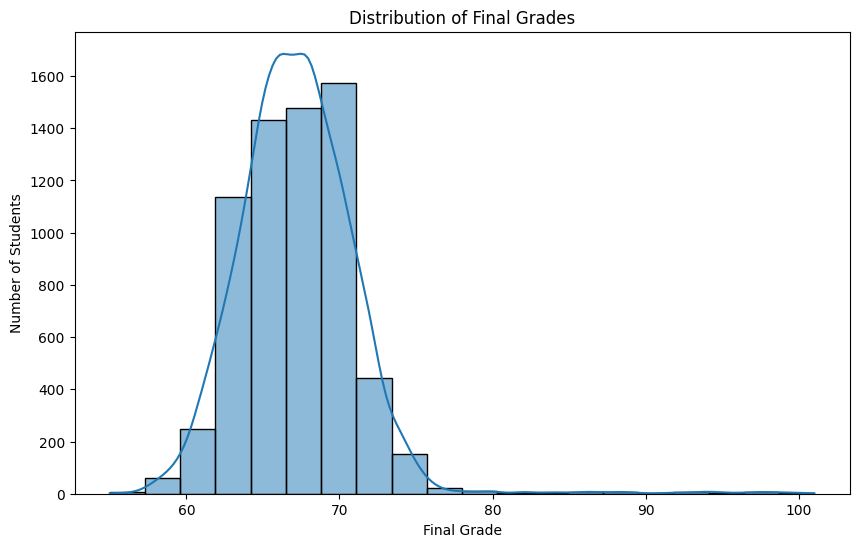

In [34]:
# Visualize the distribution of the target variable (e.g., 'Exam_Score')

# Create a histogram of the final grades
plt.figure(figsize=(10, 6))
sns.histplot(df['Exam_Score'], bins=20, kde=True)
plt.title('Distribution of Final Grades')
plt.xlabel('Final Grade')
plt.ylabel('Number of Students')
plt.show()